In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/cats_vs_dogs/cats_vs_dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: cats_vs_dogs/train/Dog/dog.8023.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8024.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8025.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8026.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8027.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8028.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8029.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8030.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8031.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8032.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8033.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8034.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8035.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8036.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8037.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8038.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8039.jpg  
  inflating: cats_vs_dogs/train/Dog/dog.8040.jpg  
  inflating: cats_vs_dogs/train

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.vgg16 import preprocess_input

In [4]:
train_path ='/content/cats_vs_dogs/train'
valid_path = '/content/cats_vs_dogs/valid'
test_path = '/content/cats_vs_dogs/test'

In [5]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
training_set = train_datagen.flow_from_directory(directory=train_path,
                             target_size=(128,128),
                             batch_size=32,
                             class_mode='categorical'
    
)

validation_set = train_datagen.flow_from_directory(directory=valid_path,
                             target_size=(128,128),
                             batch_size=32,
                             class_mode='categorical'
    
)
test_set = train_datagen.flow_from_directory(directory=test_path,
                             target_size=(128,128),
                             batch_size=32,
                             class_mode='categorical'
    
)

Found 20000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [ ]:
# image_size=[224,224]
# mobilenet_model = MobileNet(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [ ]:
# for layer in mobilenet_model.layers:
#     layer.trainable=False

In [ ]:
# x = tf.keras.layers.Flatten()(mobilenet_model.output)

In [ ]:
# prediction = tf.keras.layers.Dense(units=2, activation='softmax')(x)

In [ ]:
# model = tf.keras.models.Model(inputs=mobilenet_model.input, outputs=prediction)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
history=model.fit(training_set, validation_data=validation_set, epochs=40)

Epoch 1/40
625/625 [==============================] - 164s 210ms/step - loss: 0.9373 - accuracy: 0.5951 - val_loss: 0.6142 - val_accuracy: 0.6533
Epoch 2/40
625/625 [==============================] - 130s 209ms/step - loss: 0.6076 - accuracy: 0.6713 - val_loss: 0.5743 - val_accuracy: 0.6993
Epoch 3/40
625/625 [==============================] - 130s 208ms/step - loss: 0.5450 - accuracy: 0.7222 - val_loss: 0.6786 - val_accuracy: 0.6827
Epoch 4/40
625/625 [==============================] - 129s 207ms/step - loss: 0.5089 - accuracy: 0.7488 - val_loss: 0.5438 - val_accuracy: 0.7637
Epoch 5/40
625/625 [==============================] - 130s 208ms/step - loss: 0.4667 - accuracy: 0.7790 - val_loss: 1.4637 - val_accuracy: 0.5973
Epoch 6/40
625/625 [==============================] - 130s 207ms/step - loss: 0.4520 - accuracy: 0.7919 - val_loss: 0.5503 - val_accuracy: 0.7420
Epoch 7/40
625/625 [==============================] - 130s 208ms/step - loss: 0.4104 - accuracy: 0.8133 - val_loss: 0.4791 -

In [11]:
model.save('/content/drive/MyDrive/cats_vs_dogs/covnet_model1_adam.h5')

In [37]:
model_json = model.to_json()
with open("/content/drive/MyDrive/cats_vs_dogs/covnet_model1_Json_adam.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/cats_vs_dogs/covnet_model1_covnetWeights_adam.h5")

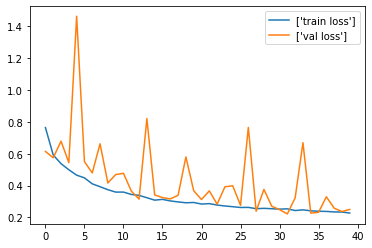

In [38]:
plt.plot(history.history['loss'], label=['train loss'])
plt.plot(history.history['val_loss'], label=['val loss'])
plt.legend()
plt.show()


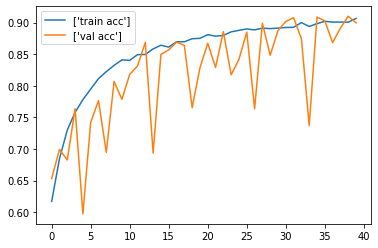

In [39]:
plt.plot(history.history['accuracy'], label=['train acc'])
plt.plot(history.history['val_accuracy'], label=['val acc'])
plt.legend()
plt.show()

In [40]:
y_predict = model.predict(test_set)
y_predict

array([[0.99574214, 0.00425784],
       [0.002361  , 0.99763906],
       [0.00769337, 0.99230665],
       ...,
       [0.9723106 , 0.02768939],
       [0.0053141 , 0.9946859 ],
       [0.21661483, 0.7833852 ]], dtype=float32)

In [41]:
y_predict = np.argmax(y_predict, axis=1)
y_predict

array([0, 1, 1, ..., 0, 1, 1])

In [42]:
y_pred=model.evaluate(test_set)

63/63 [==============================] - 11s 171ms/step - loss: 0.2896 - accuracy: 0.8870


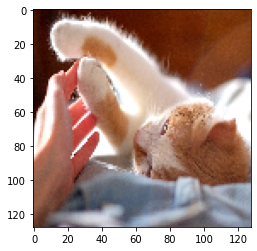

In [43]:
img_path='/content/catttt.jpg'
img=image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)

In [44]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [45]:
a=np.argmax(model.predict(x))

In [46]:
if a == 1:
  print('it is dog')
else:
  print('it is a cat')

it is a cat
